# Lending Club Case Study

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Data Cleaning

In [8]:
df.shape

(39717, 111)

##### Find percentage of null values in each column


In [11]:
df.isna().mean() * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

#### Identify columns that can be removed based on the following criteria:
* Columns with 100% null values should be removed as they provide no useful information.
* Columns with only a single unique value can be removed since they do not contribute to the analysis.
* Remove Columns with more than 60% of null values since ther is no sufficient information for analysis
  

In [13]:
# Dropping all columns which have more than 60% null values as these are useless for our analysis
df = df.dropna(thresh=len(df)-39717*0.6, axis=1)

In [15]:
# Drop columns containing single unique value
df = df.drop(columns=['collections_12_mths_ex_med', 'application_type', 'acc_now_delinq', 
                      'chargeoff_within_12_mths','delinq_amnt', 'tax_liens',
                      'policy_code', 'pymnt_plan', 'policy_code', 'initial_list_status'])

In [17]:
# Drop columns which are not useful
df = df.drop(columns=['id', 'member_id', 'emp_title', 
                      'url', 'desc', 'zip_code', 'addr_state',
                       'last_credit_pull_d',
                      'last_pymnt_amnt','last_pymnt_d', 
                      'collection_recovery_fee', 'recoveries',
                      'earliest_cr_line', 'inq_last_6mths' ])

In [19]:
# Removing following columns out_prncp, out_prncp_inv, total_rec_prncp, total_rec_int Since we already have total_pymnt, total_pymnt_inv
df = df.drop(columns=['out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int'])

In [21]:
df = df.drop(columns=['funded_amnt_inv', 'total_pymnt_inv', 'total_rec_late_fee'])

##### Check the percentage of null values in each column and the remaining columns. 

In [23]:
#Check what percentage of columns have null values
df.isna().sum()*100/len(df)

loan_amnt               0.000000
funded_amnt             0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.027696
dti                     0.000000
delinq_2yrs             0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.125891
total_acc               0.000000
total_pymnt             0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

#### Modify columns:
* Remove the word "Months" from the Term column.
* Eliminate the "%" sign from int_rate and revol_util, then convert the values to float.

In [25]:
# remove "months" from the term and convert to integer
df['term'] = df['term'].str[:-6].astype(int)

In [27]:
# Removed % from the end and converted to float
df['int_rate'] = df['int_rate'].str[:-1].astype(float)

In [29]:
df['revol_util'] = df['revol_util'].str[:-1].astype(float)

In [31]:
df.shape

(39717, 24)

### Mutation


Some rows have a missing "emp_length" value. For these rows, we will use the mode of "annual_inc" from rows with empty "emp_length" to determine the corresponding "emp_length" and fill in the missing values.

In [35]:
df['emp_length'].isna().sum()

1075

In [37]:
# What is the frequent annual income of employees where employee length is missing
df[df['emp_length'].isna()]['annual_inc'].mode()

0    36000.0
Name: annual_inc, dtype: float64

In [39]:
# Mode of annual_inc where emp_length is null is 36000. We will calculate the mode of the employee length which has 36000 annual_inc
df[df['annual_inc'] == 36000]['emp_length'].mode()

0    3 years
Name: emp_length, dtype: object

In [41]:
df['emp_length'].fillna('3 years', inplace=True)

In [43]:
df['emp_length'].isna().sum()

0

In [45]:
#Fix emp_length column
df['emp_length'] = df['emp_length'].apply(lambda x : "10" if x == "10+ years" else "0" if x == "< 1 year" else "1" if x == '1 year' else str(x)[0:1])

In [47]:
df['emp_length'] = df['emp_length'].astype("int64")

### Unify values like Source Verified and Verified under same value

In [50]:
df['verification_status'] = df['verification_status'].apply(lambda x : "Verified" if x == 'Source Verified' else x)

### Verify the maximum number of null values in each row.

In [53]:
#Check how many values in rows are null.
df.isna().sum(axis=1).max()

1

Since there are at max only 2 values missing not removing any rows.

### Remove columns which are not useful in analysis

##### Since the "Current" loan status represents ongoing loans, it will not provide any valuable insights, so these rows will be removed.

In [58]:
df_loan = df[df['loan_status'] != 'Current']

In [60]:
df_loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
pub_rec_bankruptcies    float64
dtype: object

## Categorical Variables - 
* Ordered Categorical Variables - 
        grade, sub_grade
* UnOrdered Categorical Variables - 
        verification_status, loan_status
* Quantitative Variables  
    funded_amnt, int_rate, installment, 
    annual_inc, dti, delinq_2yrs, pub_rec, revol_bal, 
    revol_util, total_acc, total_pymnt, pub_rec_bankruptcies, open_acc  

#### Convert numberical variables into ordered categorical

In [64]:
df_loan['annual_inc_bin'] = pd.cut(df_loan['annual_inc'], bins=[0, 35000, 60000, 80000, 130000, 300000])
df_loan['int_rate_bin'] = pd.cut(df_loan['int_rate'], bins=5)
df_loan['dti_bin'] = pd.cut(df_loan['dti'], bins=5)
df_loan['installment_bin'] = pd.cut(df_loan['installment'], bins=5)

##### Categorize the columns into ordered categorical, unordered categorical, and quantitative types.

In [67]:
loan_status_order_categorical_col = ['grade', 'sub_grade', 'term', 'emp_length', 'annual_inc_bin', 'int_rate_bin', 'dti_bin', 'installment_bin']
loan_status_unorder_categorical_col = ['verification_status', 'loan_status', 'home_ownership', 'purpose' ]
loan_status_continuous_col = ['int_rate', 'annual_inc', 'dti', 'installment', 'delinq_2yrs', 'pub_rec_bankruptcies']

# Univariate Analysis

### Univariate analysis - Unordered Categorical

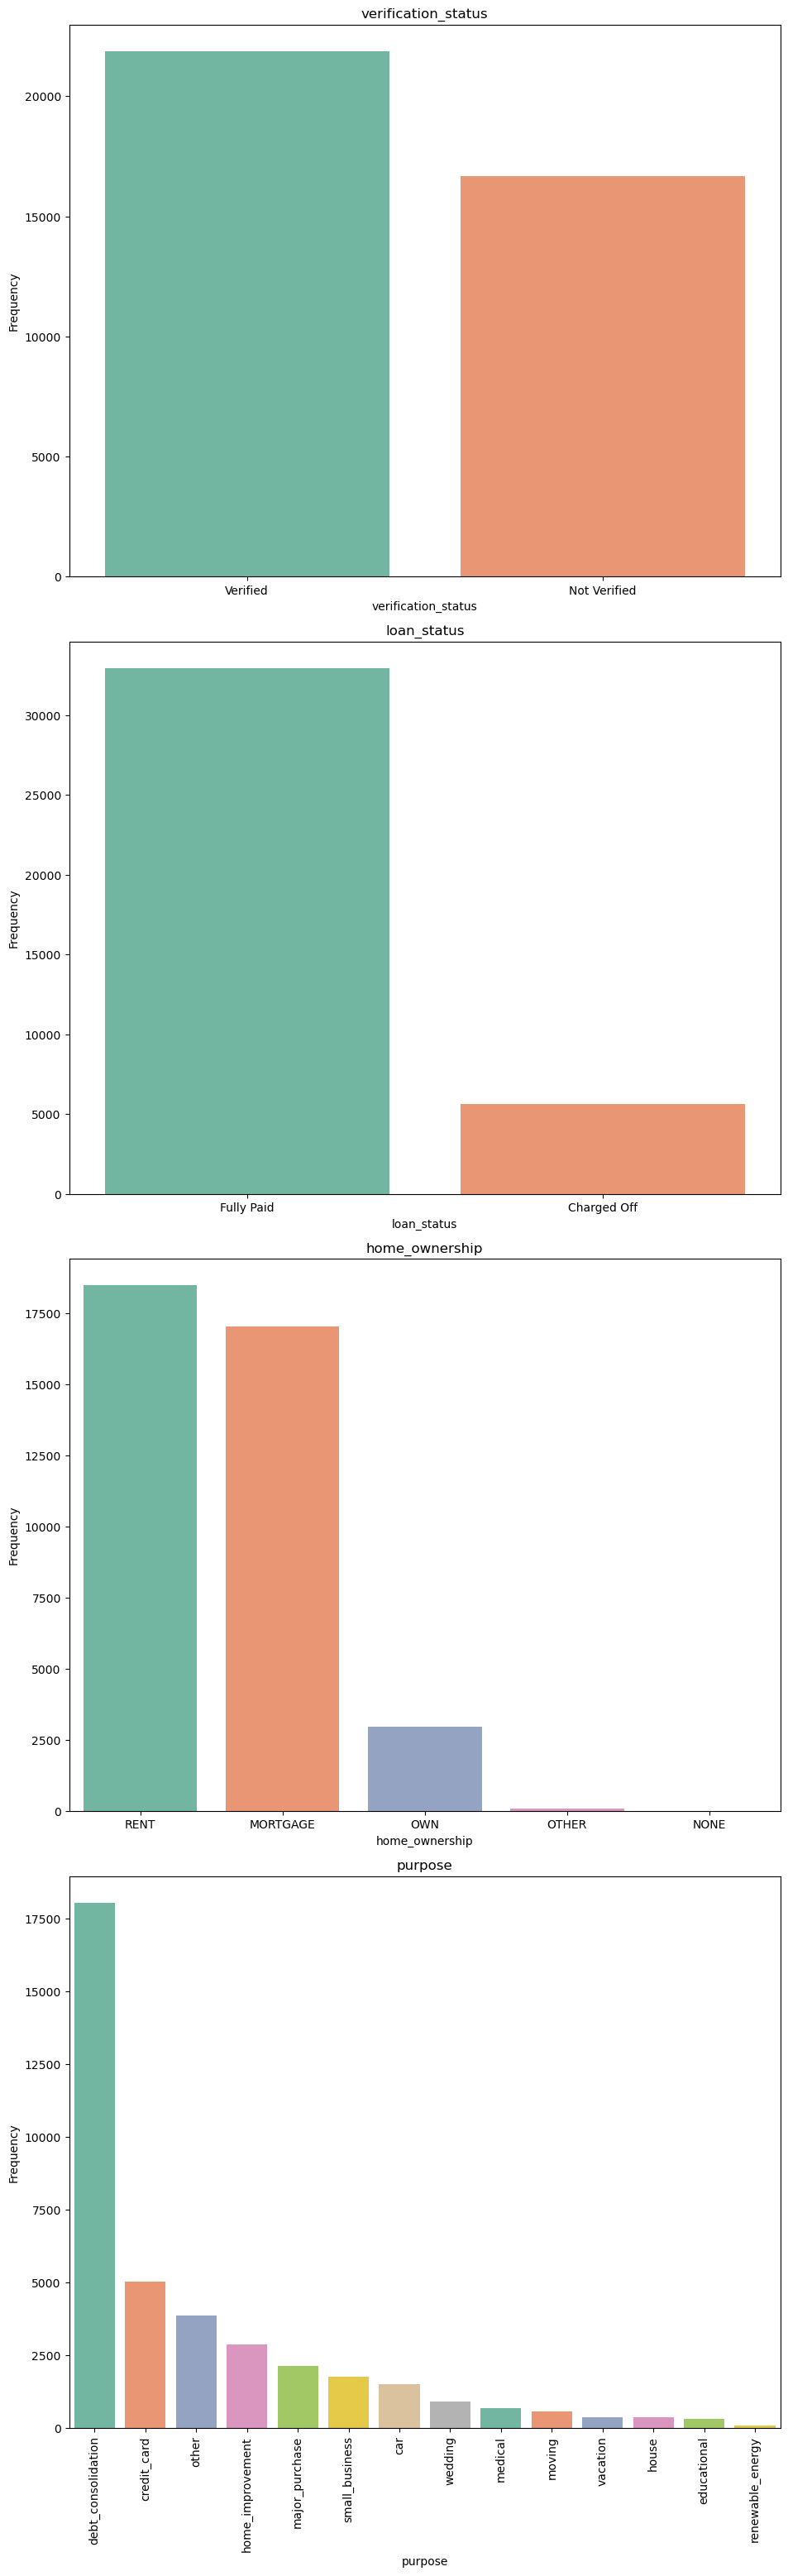

In [74]:
fig, axs = plt.subplots( len(loan_status_unorder_categorical_col), 1, figsize=(10, 30))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_unorder_categorical_col):
    sns.countplot(data=df_loan, x=col,  palette="Set2", ax=axs[index], order=df_loan[col].value_counts().index)
    axs[index].set_title(col) 
    axs[index].set_ylabel('Frequency') 
    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()
plt.xticks(rotation=90)

plt.show()

**Insights** 
1. Most of borrowers are verified
2. Most of the loans are fully paid
3. Most of the borrowers have Rented or Mortgage home ownership
4. Most of the loans are taken for debt_consolidation

### Univariate Analysis - Ordered Categorical 

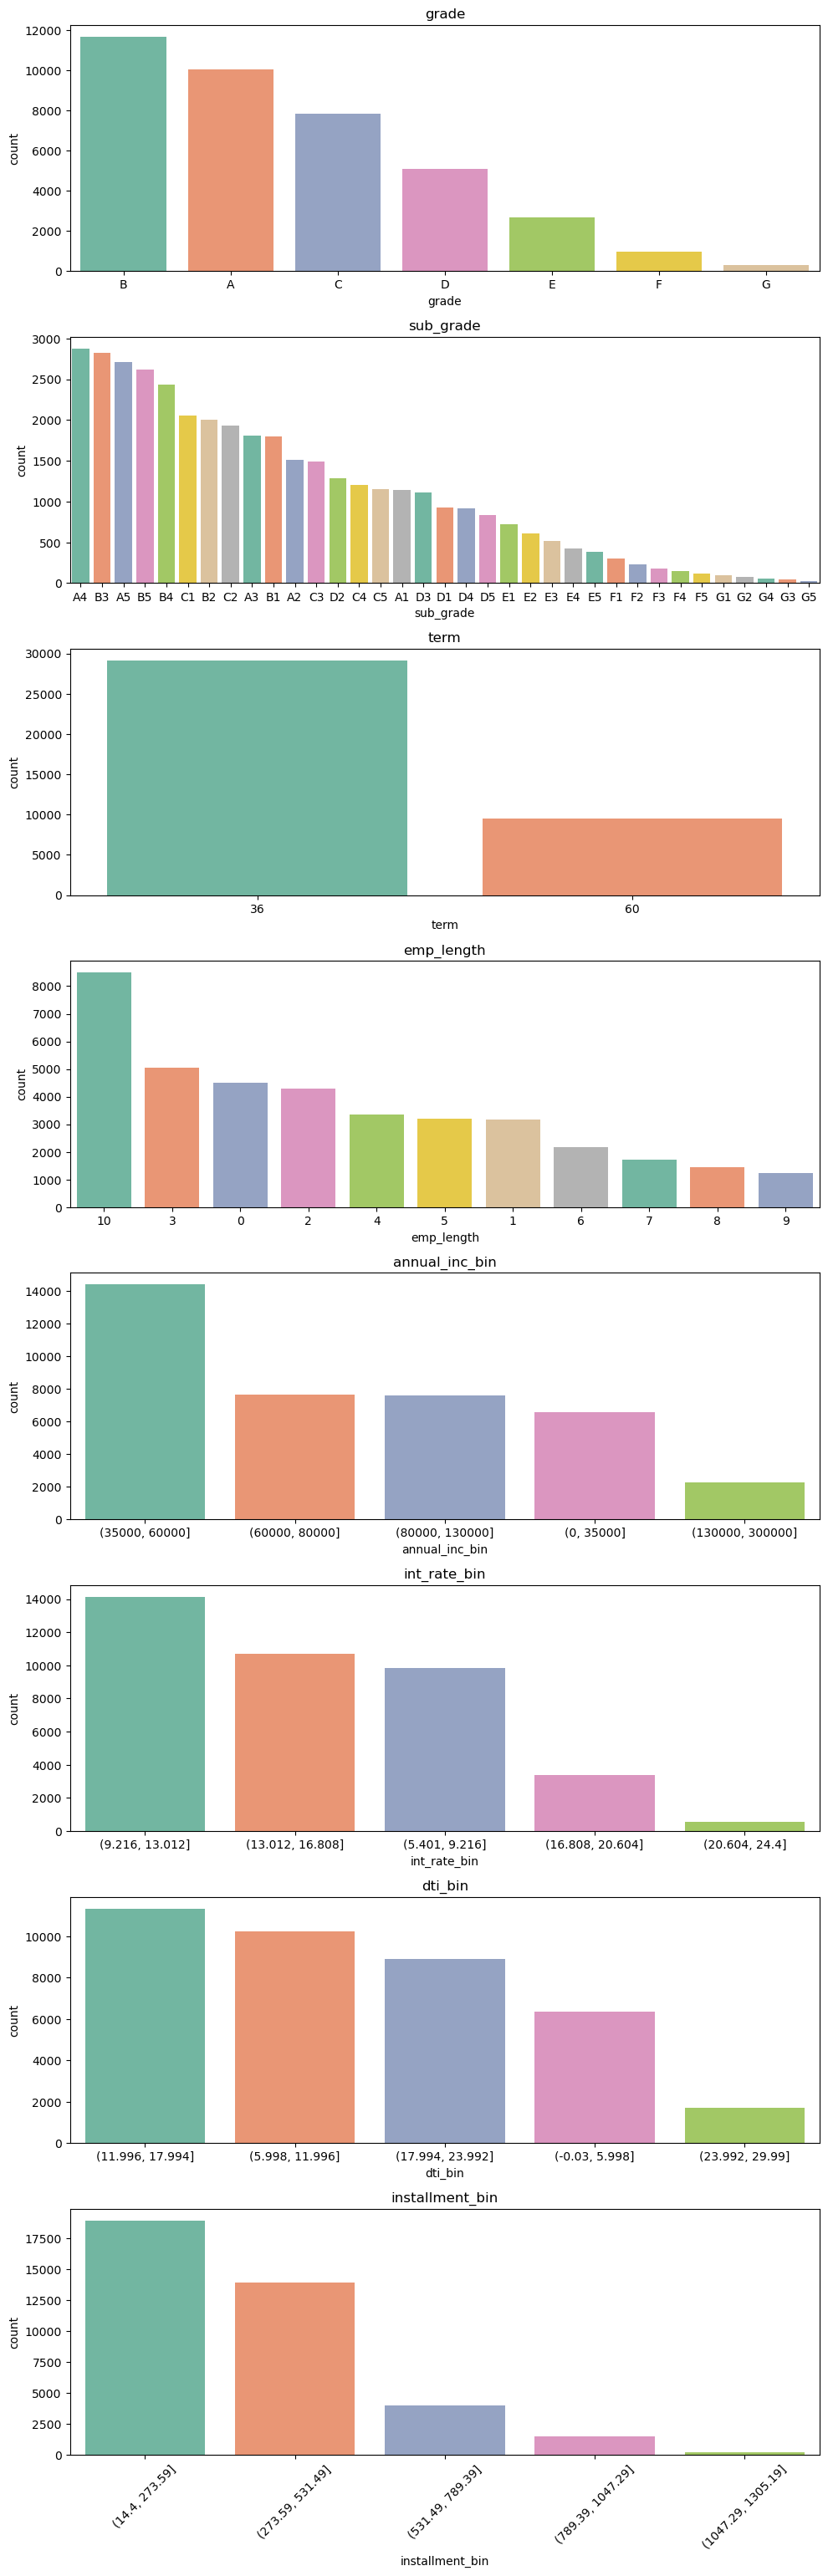

In [77]:
# Create subplots for each categorical column
fig, axs = plt.subplots( len(loan_status_order_categorical_col), 1, figsize=(10, 30))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_order_categorical_col):
    sns.countplot(data=df_loan, x=col,  palette="Set2", ax=axs[index], order=df_loan[col].value_counts().index)
    axs[index].set_title(col)  # Set title for each subplot
    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

**Insights**
1. Most of the loans are graded A or B
2. Top 5 sub-grades for the loans are A4, B3, A5, B5, B4
3. Most of the loans are taken for 36 months
4. Most of the borrowers have 10+ years of employment
5. Most of the borrowers fall in the range of 35000 - 60000
6. Most of the loans have interest rate in the range of 9.2% - 13%
7. Most of the borrowers have dti in the range 11.9 - 18
8. Most of the installments are in the range 14.4 - 273.6

### Univariate Analysis - Continuous Data

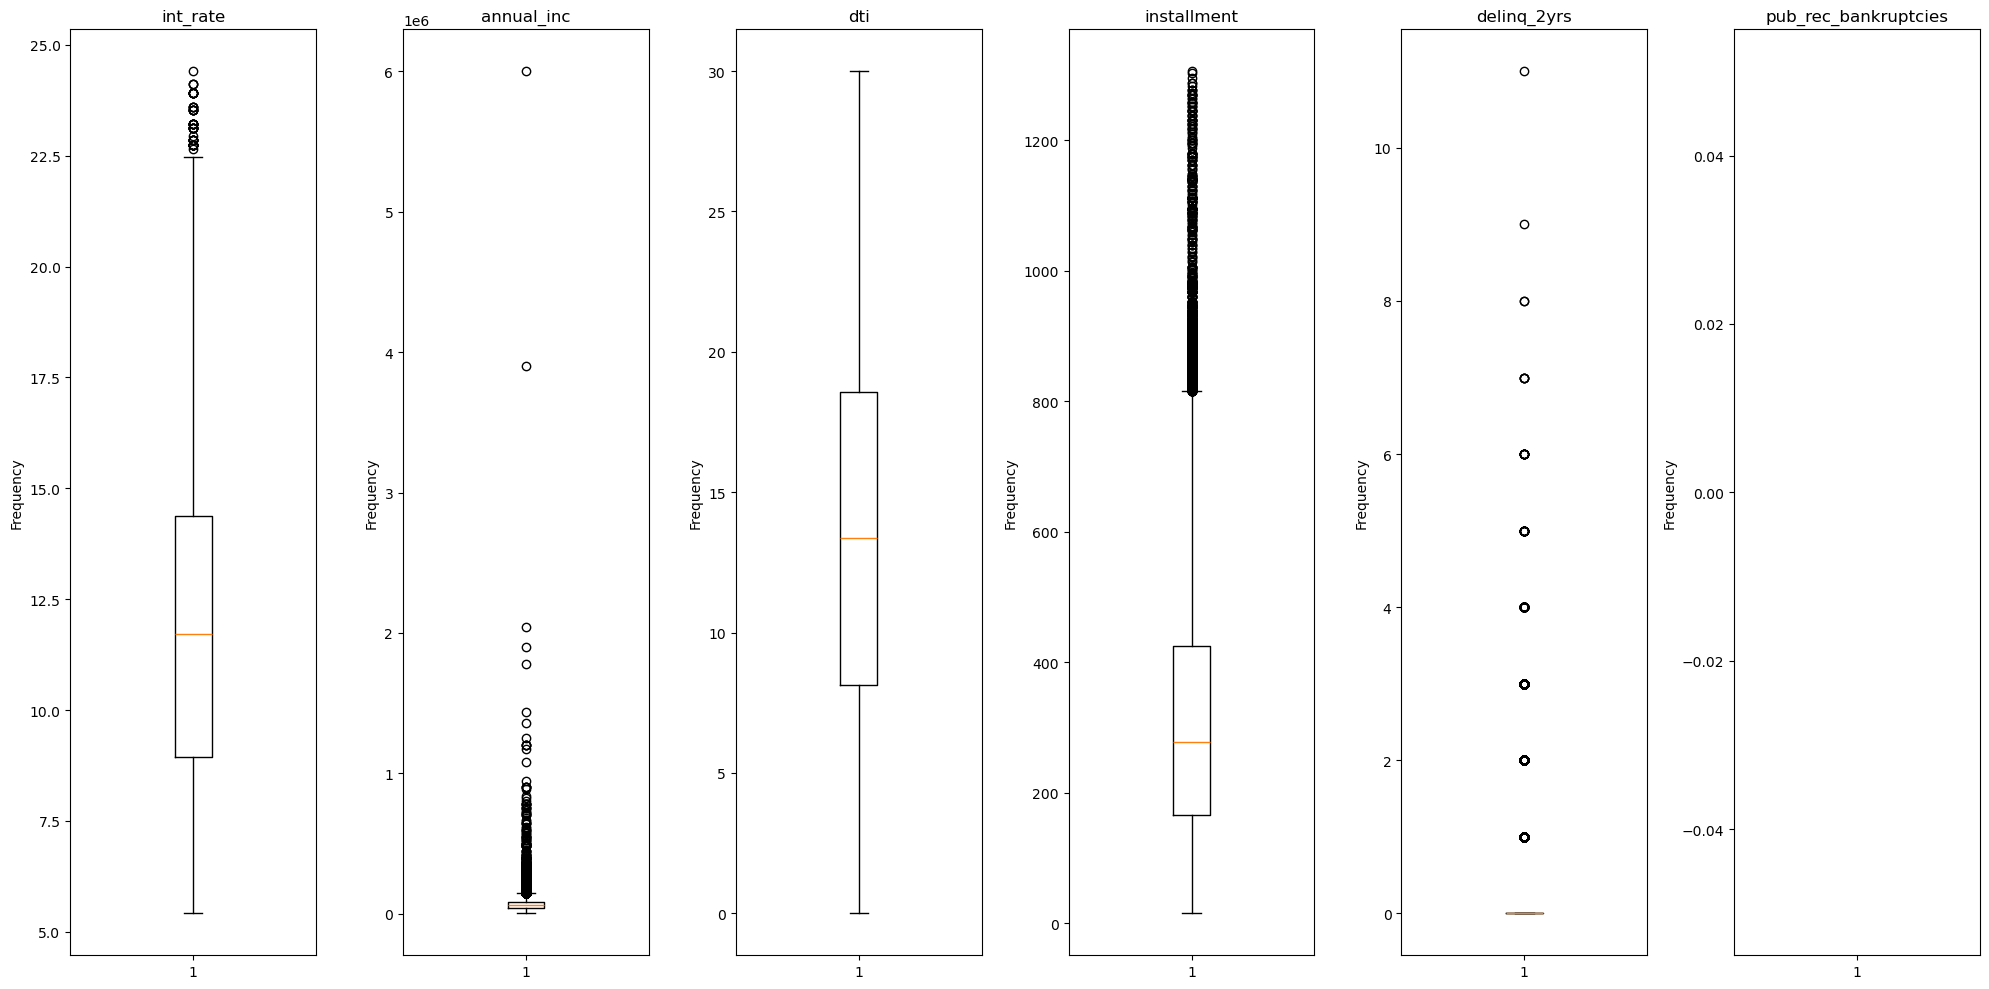

In [81]:

# Create subplots for each categorical column
fig, axs = plt.subplots(1, len(loan_status_continuous_col), figsize=(20, 10))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_continuous_col):
    axs[index].boxplot(df_loan[col])
    axs[index].set_title(col)  # Set title for each subplot
    axs[index].set_ylabel('Frequency')  # Optional: Set ylabel for clarity

    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()

plt.show()

##### Removing outliers

##### int_rate


In [85]:
# Check for % of loans with int_rate > 22.5
print(len(df_loan[df_loan['int_rate'] > 22.5])*100/len(df_loan))

0.16849418047022838


In [87]:
# Since int_rate greater than 22.5 is 0.17% hence we can remove them
df_loan = df_loan[df_loan['int_rate'] < 22.5]

In [89]:
# Check for % of loans with income >= 200000
print(len(df_loan[df_loan['annual_inc']  >= 200000])*100/len(df_loan))

1.7812629829663482


In [91]:
#Remove outliers for annual income income >= 200000 
df_loan = df_loan[df_loan['annual_inc'] < 200000]

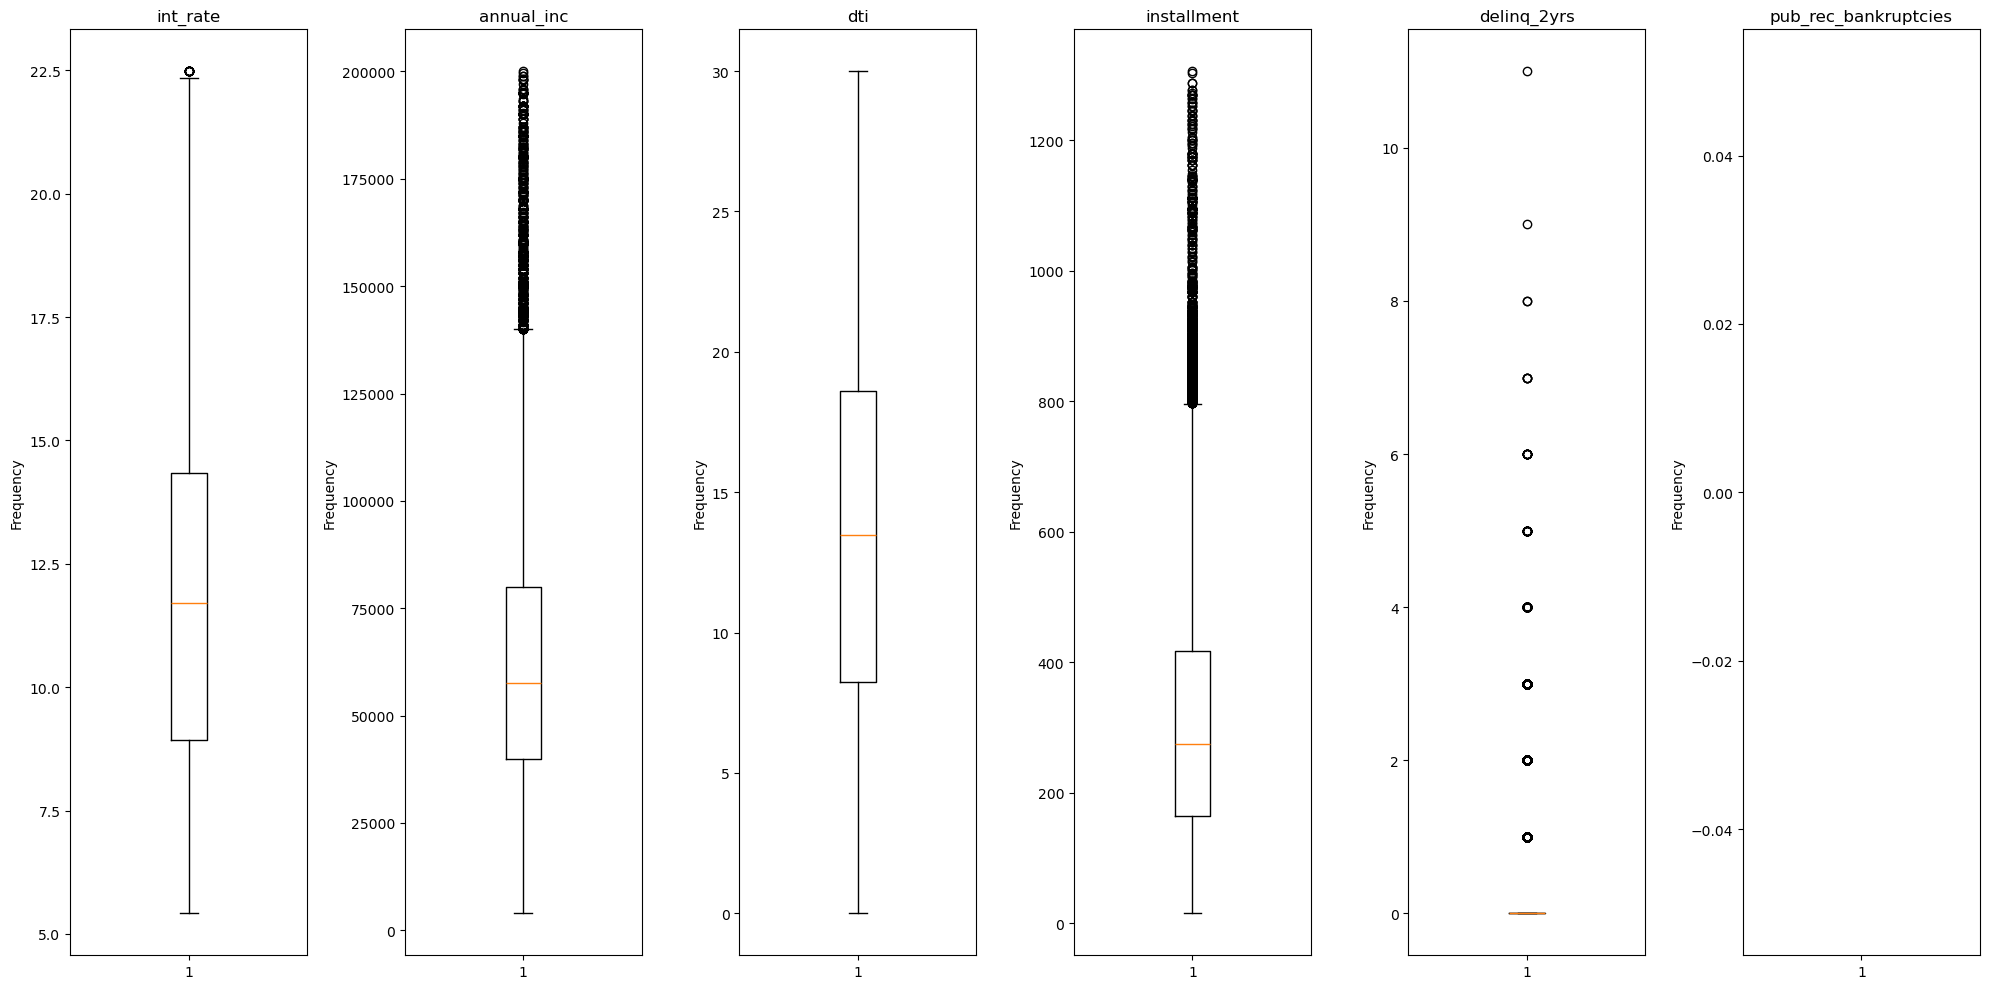

In [93]:
#Checking the data again

# Create subplots for each categorical column
fig, axs = plt.subplots(1, len(loan_status_continuous_col), figsize=(20, 10))

# Loop through the columns and plot on each subplot
for index, col in enumerate(loan_status_continuous_col):
    axs[index].boxplot(df_loan[col])
    axs[index].set_title(col)  # Set title for each subplot
    axs[index].set_ylabel('Frequency')  # Optional: Set ylabel for clarity

    
# Adjust the layout to avoid overlap of subplots
plt.tight_layout()

plt.show()

# Bivariate Analysis

### Correlation

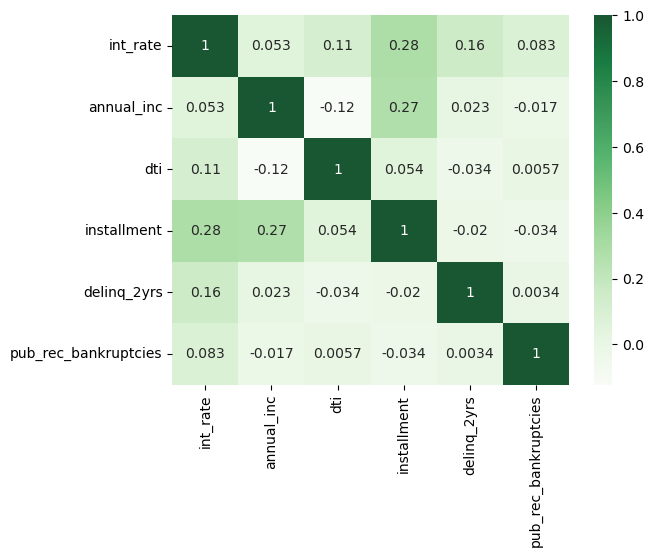

In [96]:
df_filtered= df[loan_status_continuous_col].corr()
sns.heatmap(df_filtered, cmap="Greens", annot=True, alpha=0.9)
plt.show()

## Compare loan_status with parameters like 
     * verification_Status
     * annual income
     * grade and subgrade
     * dti
     * delinq_2yrs
     * pub_rec_bankruptcies    

# Bivariate Analysis - UnOrdered Categorical
'verification_status', 'loan_status', 'home_ownership', 'purpose'

In [100]:
def count_plot_util(data, col, palette, percent, title, hue=None, y=None) :
    fig, ax = plt.subplots(figsize=(12,6), dpi=100)
    
    sns.countplot(data=data, x=col, palette=palette, order=df_loan[col].value_counts().index, hue=hue)
    # Calculate percentages and annotate on the bars
    total = len(data)
    for p in ax.patches:
        if percent :
            total_count = len(df)
            plt.gca().set_yticklabels([f'{i/total_count*100:.2f}%' for i in plt.gca().get_yticks()])
            height = p.get_height()
            percentage = (height / total) * 100
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 9),
                        textcoords='offset points')
        else: 
             count = p.get_height()  # Get the height of each bar (the count value)
             ax.annotate(f'{count}',  # Text to show on the bar
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning text in the center of the bar
                ha='center', va='center', fontsize=12, color='black',  # Alignment and style
                xytext=(0, 5),  # Offset text slightly above the bar
                textcoords='offset points')
    
    plt.legend()
    plt.xticks(rotation=90)
    plt.title(title)
    
    plt.show()

In [103]:
'''
Plot the percentage of defaults relative to the total values for a given column.
For example, for the verification_status column, this method will generate a graph showing the percentage of loans defaulted based on the total number of loans in each verification status category.
Formula: (count of defaulted loans with verified status / total number of loans with verified status) * 100
'''
def bar_plot_defaulter_perc(data, col, title):
    purpose_default_loans = data[data['loan_status'] == 'Charged Off'][col].value_counts().reset_index()
    purpose_default_loans.columns = [col ,'default_count']
    
    purpose_total_loans = data[col].value_counts().reset_index()
    purpose_total_loans.columns = [col ,'total_count']
    
    result = pd.merge(purpose_default_loans, purpose_total_loans, on=col, how='inner')
    result['perc'] = result['default_count'] * 100/result['total_count']
    data = result[[col,'perc']]
    result_sorted = result.sort_values(by='perc', ascending=False)
    ax = sns.barplot(data=result_sorted, x=col, y='perc', palette="Set2", order=result_sorted[col])
    for p in ax.patches:
        # Get the height of each bar
        height = p.get_height()
        # Set the annotation on top of the bars
        ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.2f}%', 
                ha="center", va="bottom", fontsize=10, color='black', rotation=90)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

#### Loan Status Vs Verification status

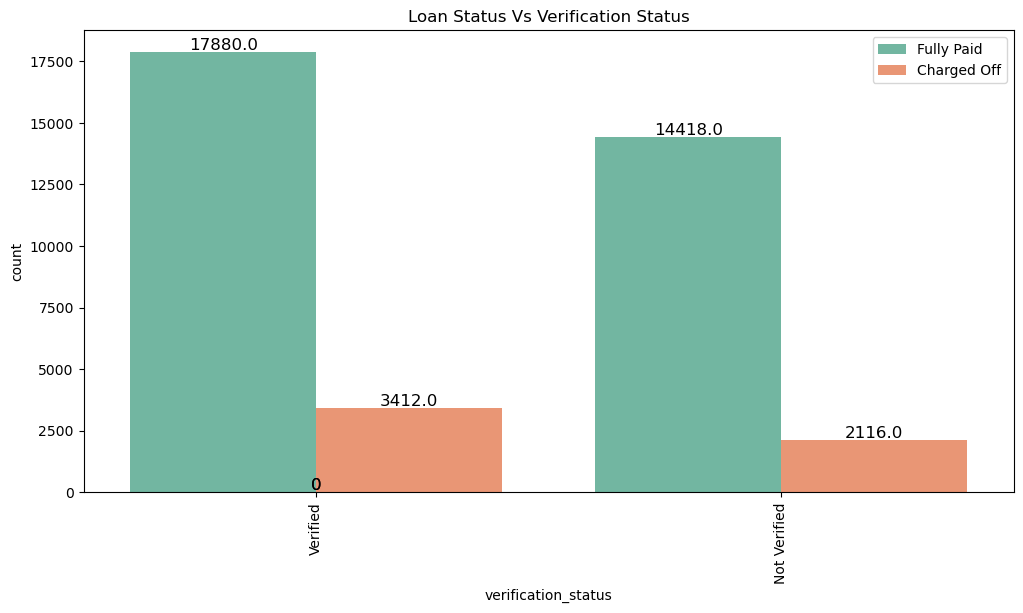

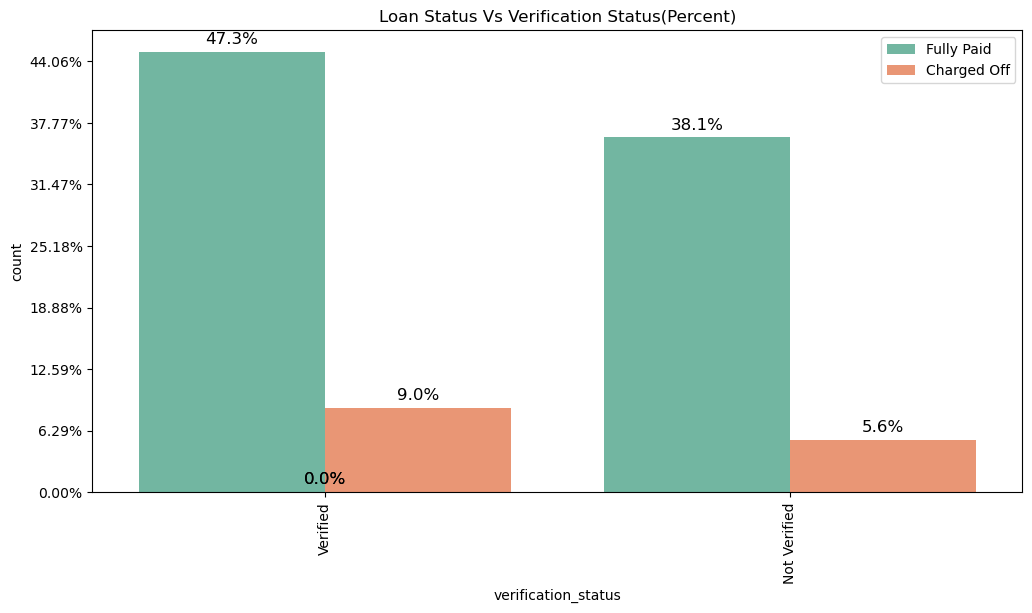

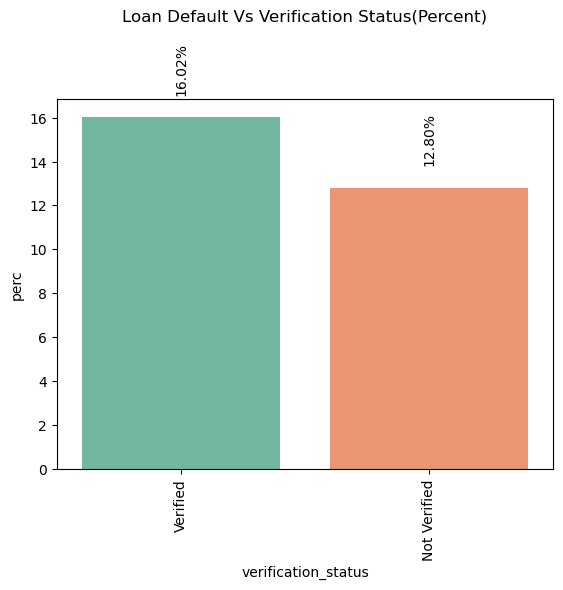

In [106]:
count_plot_util(df_loan, 'verification_status', "Set2", False, "Loan Status Vs Verification Status", 'loan_status')
count_plot_util(df_loan, 'verification_status', "Set2", True, "Loan Status Vs Verification Status(Percent)", 'loan_status')
bar_plot_defaulter_perc(df_loan, 'verification_status', "Loan Default Vs Verification Status(Percent)\n\n\n\n")

**Insight**

16% of the verified people default loan compared to Non Verified which is 12%

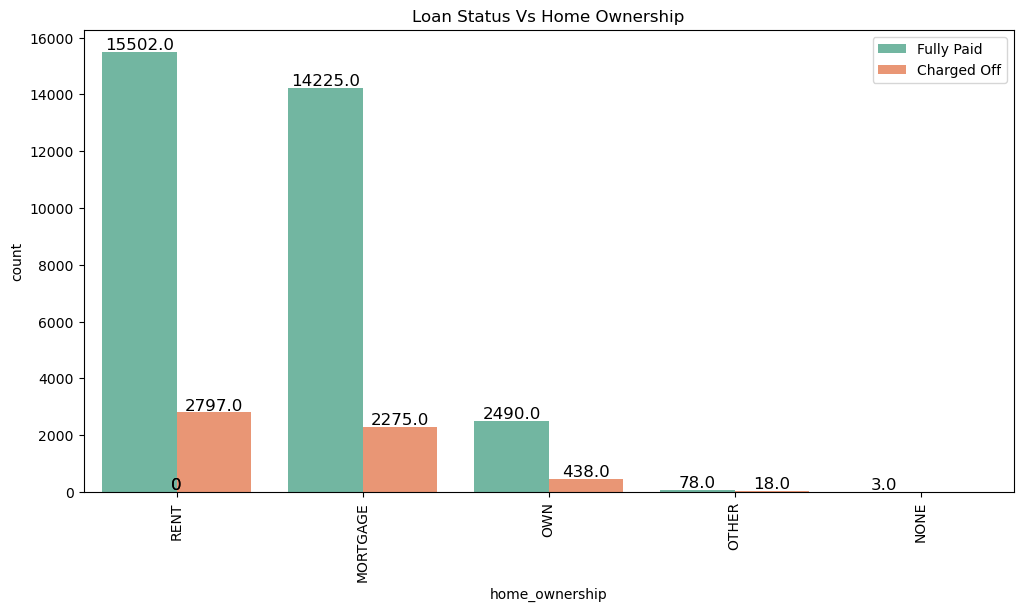

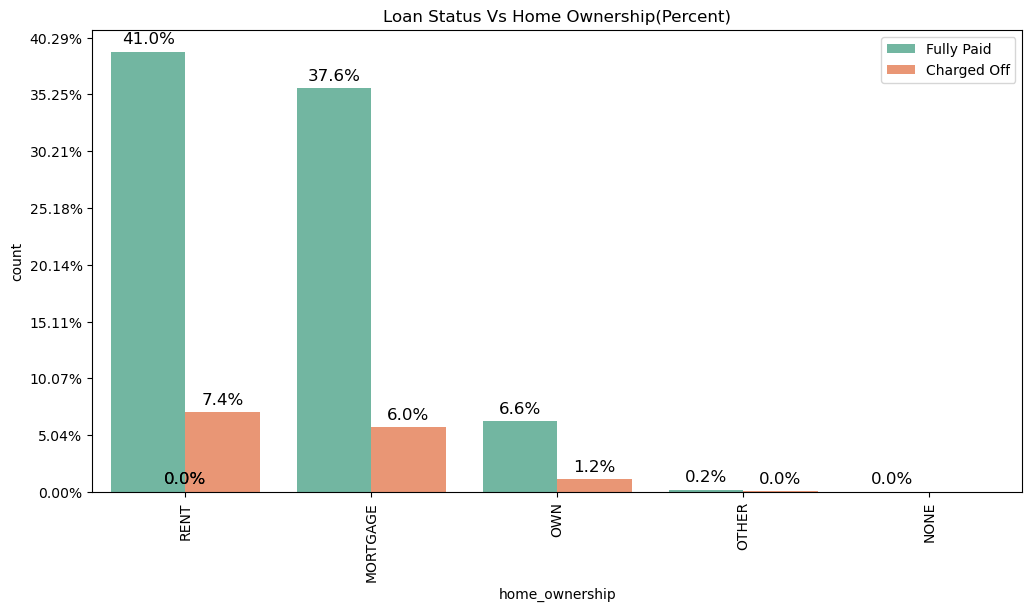

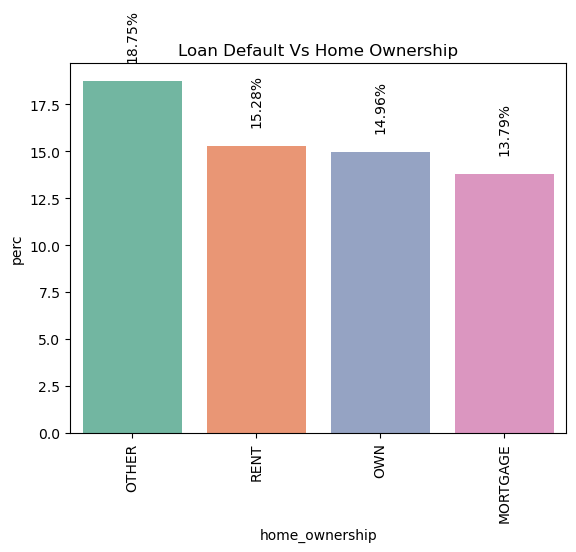

In [108]:
count_plot_util(df_loan, 'home_ownership', "Set2", False, "Loan Status Vs Home Ownership", 'loan_status')
count_plot_util(df_loan, 'home_ownership', "Set2", True, "Loan Status Vs Home Ownership(Percent)", 'loan_status')
bar_plot_defaulter_perc(df_loan, 'home_ownership', "Loan Default Vs Home Ownership")

**Insight**
The default rate for Home Ownership with "Other" is 18.75%, while for Rent it is 15.2%.

### Loan Status Vs Purpose

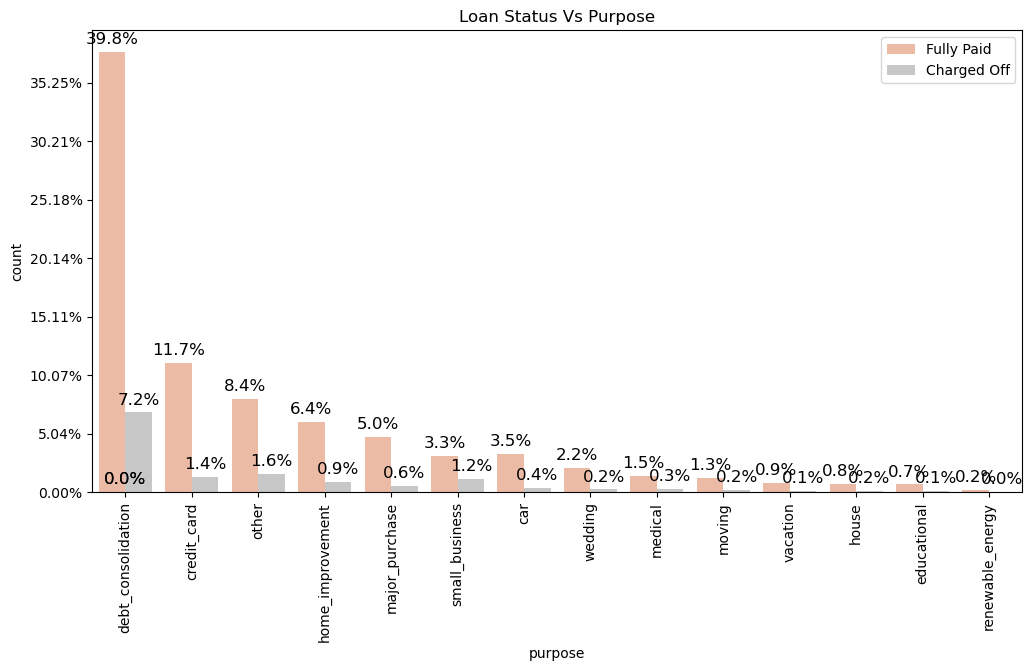

In [111]:
count_plot_util(df_loan, 'purpose', "RdGy", True, "Loan Status Vs Purpose", 'loan_status')

**Insight** - The highest percentage, 39.8%, of loans are taken for debt consolidation.

### Loan default by purpose

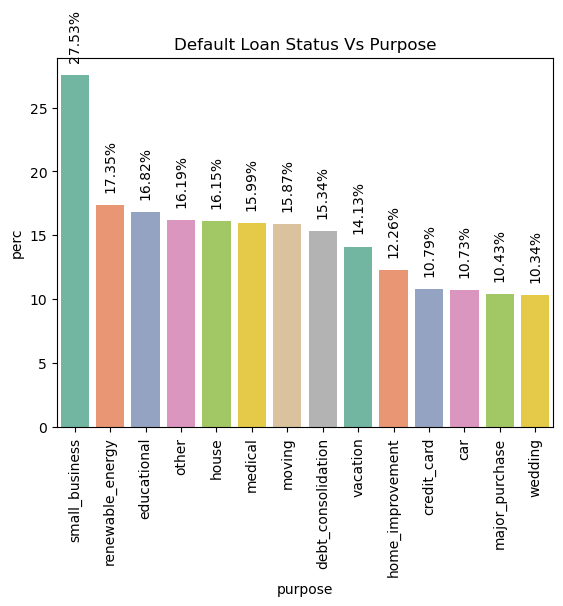

In [115]:
bar_plot_defaulter_perc(df_loan, 'purpose', "Default Loan Status Vs Purpose")

**Insight** - 27.53% of loans for small business have defaulted.

# Bivariate Analysis - Ordered Categorical 
'grade', 'sub_grade', 'term', 'emp_length'

#### Loan Status Vs Grade

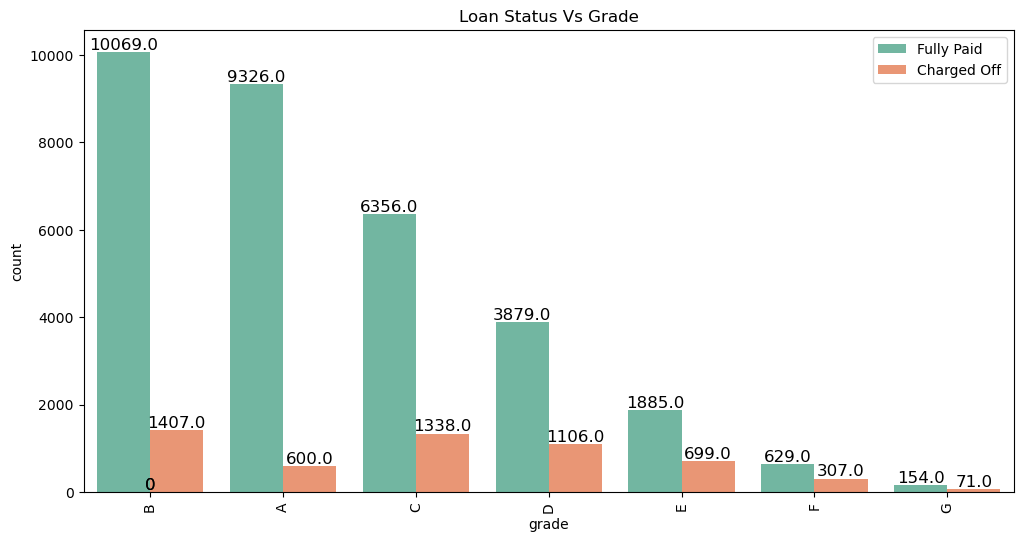

In [120]:
count_plot_util(df_loan, 'grade', "Set2", False, "Loan Status Vs Grade", 'loan_status')

**Insight** - The loan with Grades B, C and D contribute to most number of "Charged Off" loans

### Sub Grades Vs Loan Status

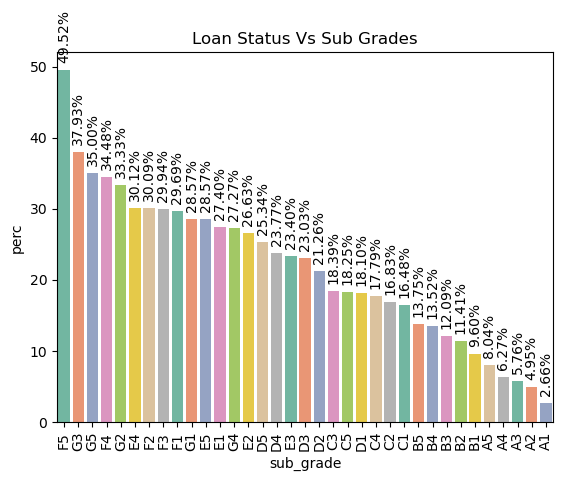

In [123]:
bar_plot_defaulter_perc(df_loan, 'sub_grade', "Loan Status Vs Sub Grades")

**Insight** - F5 and G3 are the subgrade loans with the highest default rate.

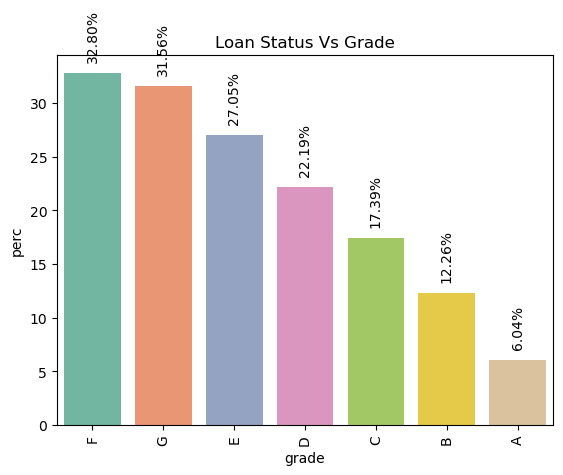

In [126]:
bar_plot_defaulter_perc(df_loan, 'grade', "Loan Status Vs Grade")

**Insight** - Loans with Grades E, F, and G have the highest default rates.

# Loan Status Vs Term

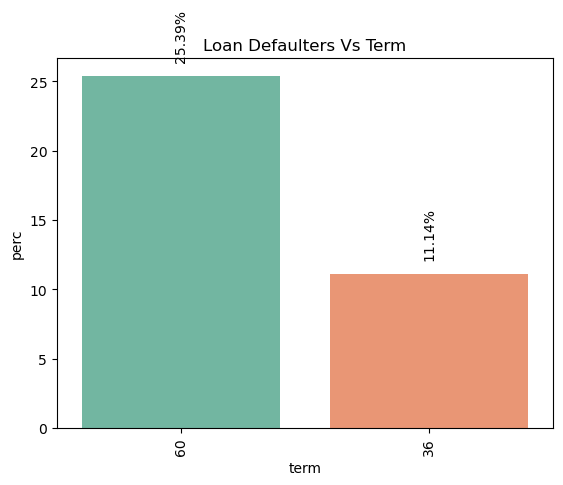

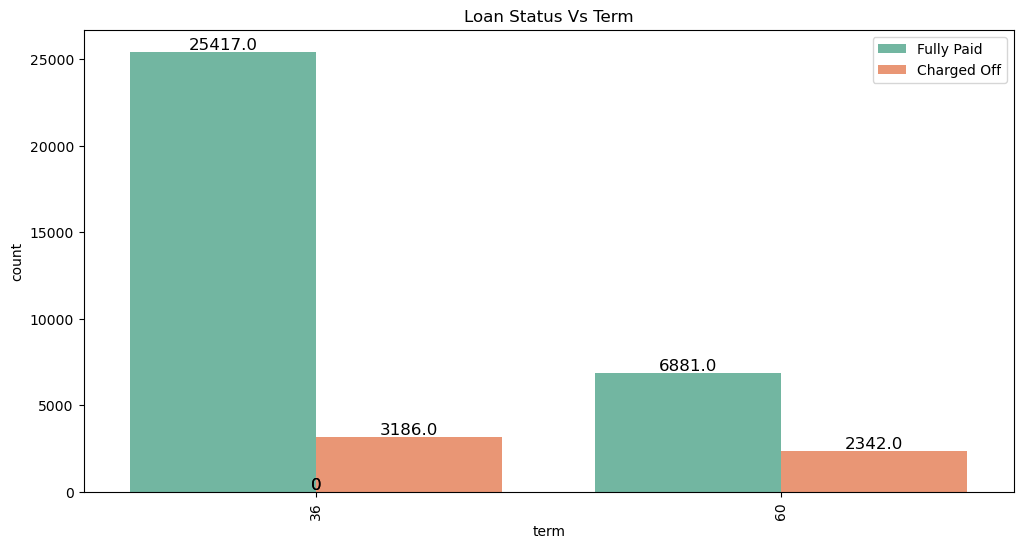

In [130]:
bar_plot_defaulter_perc(df_loan, 'term', "Loan Defaulters Vs Term")
count_plot_util(df_loan, 'term', "Set2", False, "Loan Status Vs Term", 'loan_status')

**Insight** - 25% of loans with a 60-month term default, which is higher than the 11.14% default rate for 36-month loans.

# Loan Status Vs Employee Length

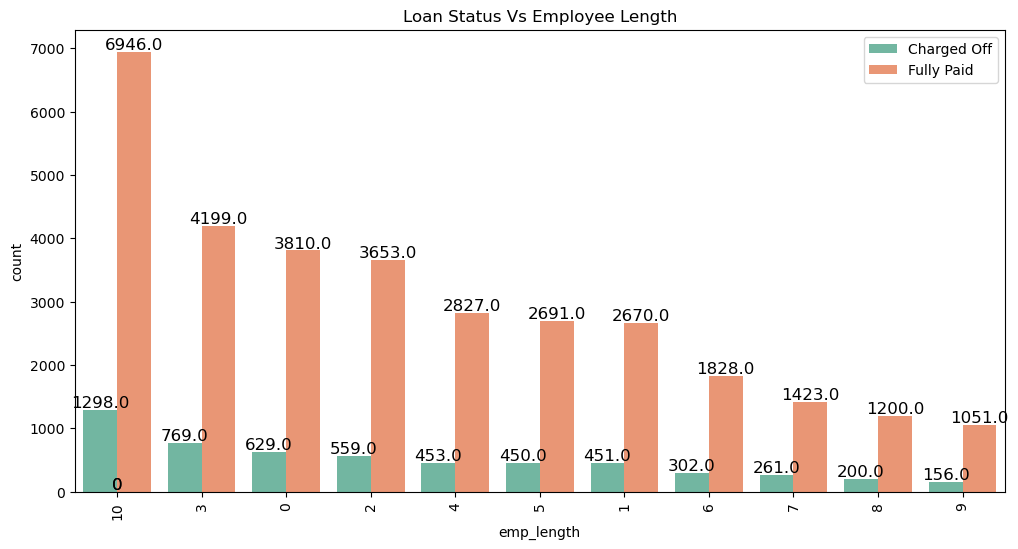

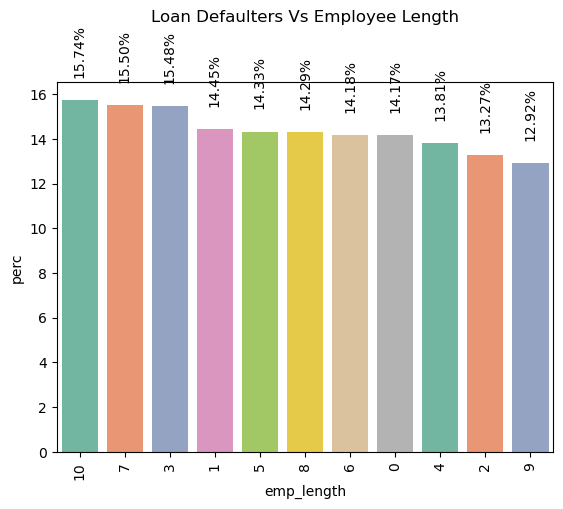

In [337]:
count_plot_util(df_loan, 'emp_length', "Set2", False, "Loan Status Vs Employee Length", 'loan_status')
bar_plot_defaulter_perc(df_loan, 'emp_length', "Loan Defaulters Vs Employee Length\n\n\n")


**Insights** - Loans with an employment length of 3 years have the highest default rate, at 17.93%.

# Loan Status Vs Annual Income

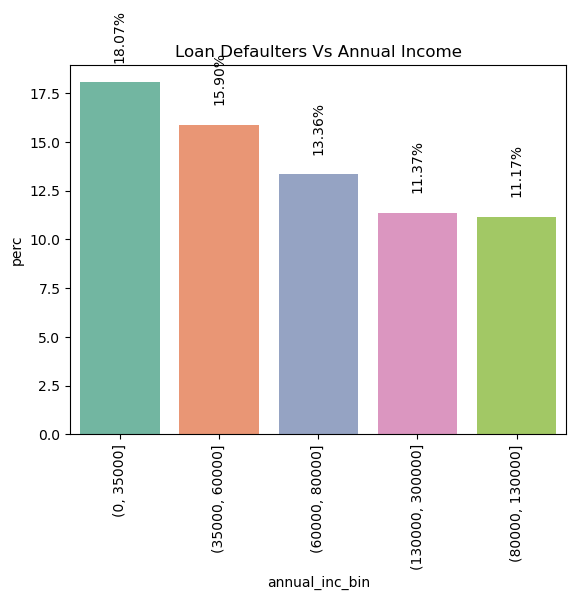

In [137]:
bar_plot_defaulter_perc(df_loan, 'annual_inc_bin', "Loan Defaulters Vs Annual Income")

**Insights** - The highest percentage of defaulters, 18.07%, have an annual income of less than 35,000.

# Loan Status Vs dti

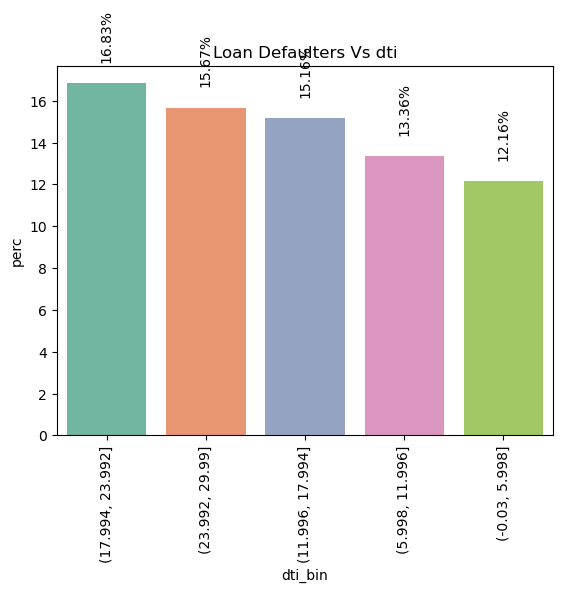

In [140]:
bar_plot_defaulter_perc(df_loan, 'dti_bin', "Loan Defaulters Vs dti")

**Insights** - A higher DTI (Debt-to-Income) ratio is associated with a greater likelihood of default.

# Loan Status Vs int rate

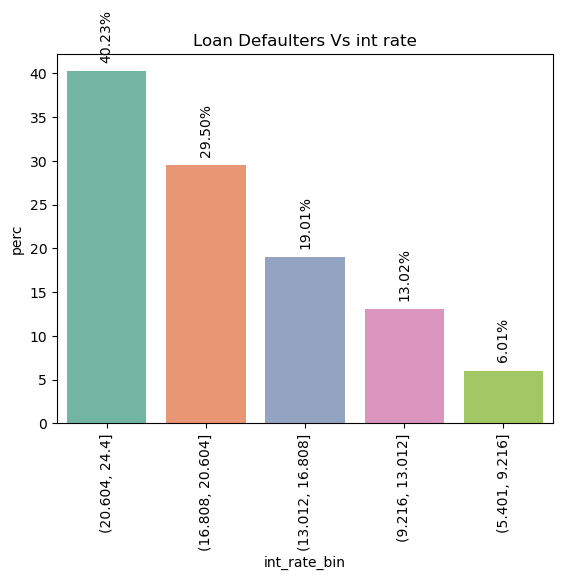

In [144]:
bar_plot_defaulter_perc(df_loan, 'int_rate_bin', "Loan Defaulters Vs int rate")

**Insights** - 40.8% of loans with an interest rate above 20% default, indicating that loans with higher interest rates have a greater likelihood of default.

# Bivariate Analysis - Quantitative Analysis
'int_rate', 'annual_inc', 'dti', 'installment', 'delinq_2yrs', 'pub_rec_bankruptcies'


#### Loan Status Vs delinq_2yrs

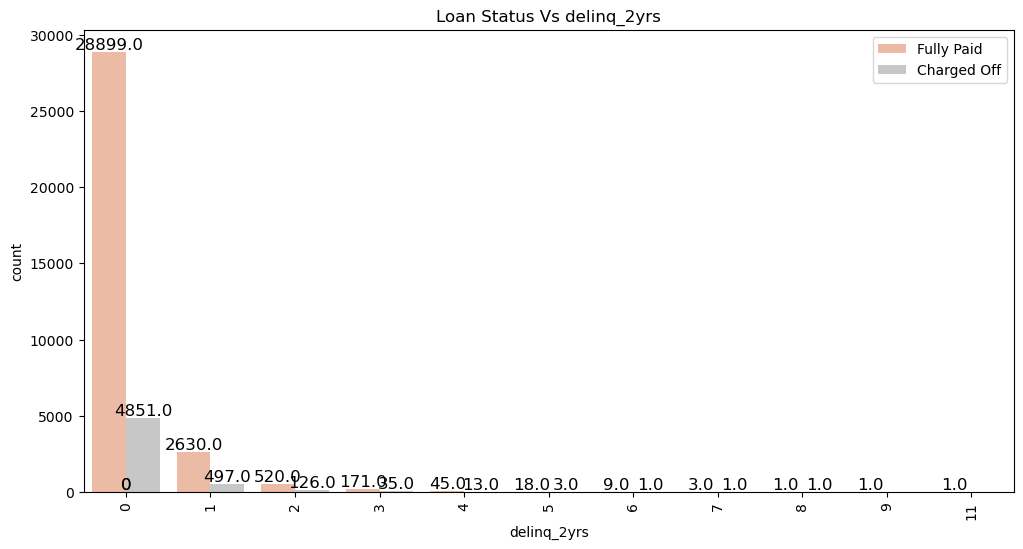

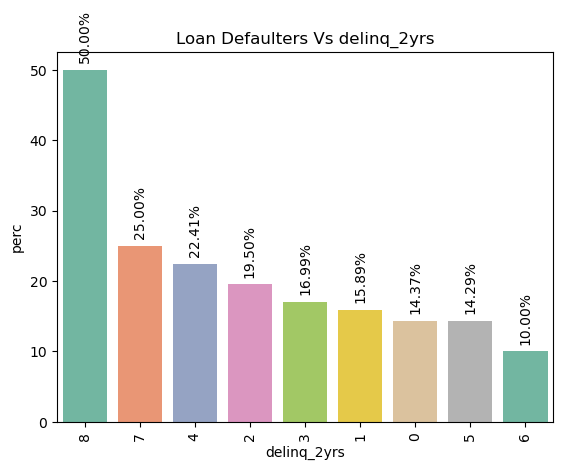

In [150]:
count_plot_util(df_loan, 'delinq_2yrs', "RdGy", False, "Loan Status Vs delinq_2yrs",'loan_status')
bar_plot_defaulter_perc(df_loan, 'delinq_2yrs', "Loan Defaulters Vs delinq_2yrs")

**Insight** - Loans are more likely to default if there are 8 or more delinquencies in the past 2 years.

## Loan Status Vs bankcrupties

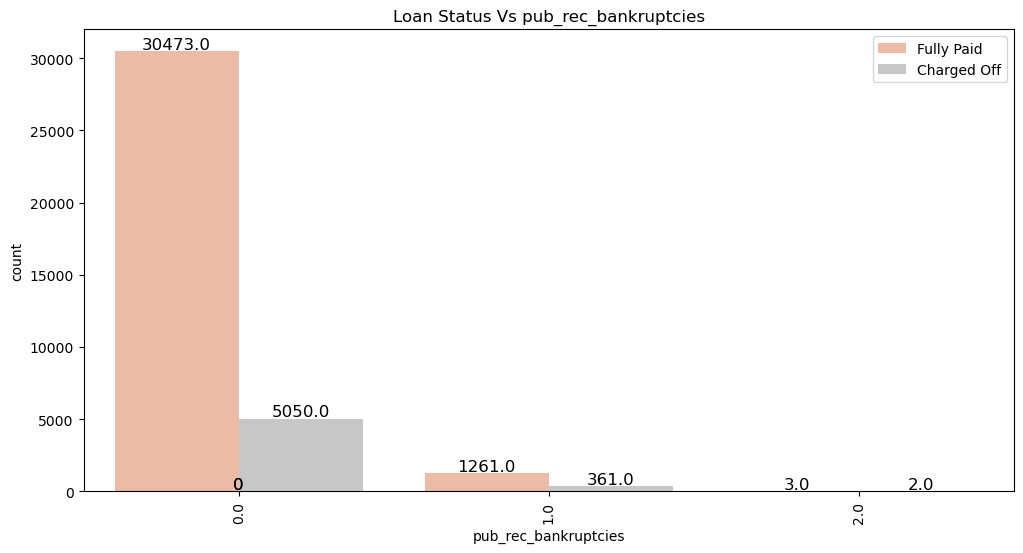

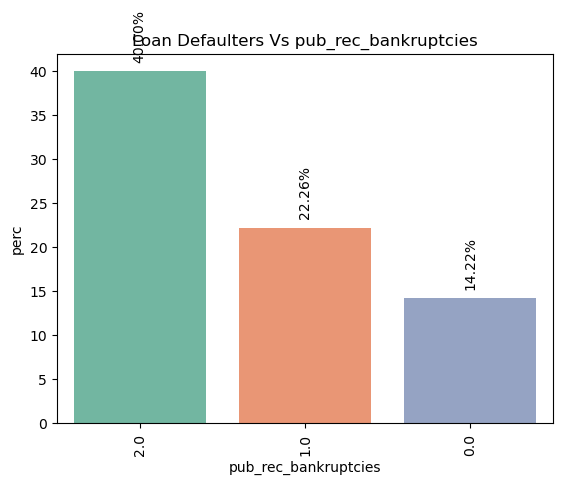

In [154]:
count_plot_util(df_loan, 'pub_rec_bankruptcies', "RdGy", False, "Loan Status Vs pub_rec_bankruptcies",'loan_status')
bar_plot_defaulter_perc(df_loan, 'pub_rec_bankruptcies', "Loan Defaulters Vs pub_rec_bankruptcies")

**Insight** - 62.36% of loans default when there are public record bankruptcies, highlighting a strong correlation between bankruptcies in public records and a higher likelihood of loan default.